In [1]:
# Import dependencies.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
prices_df = pd.read_csv(Path('../resources/prices_sorted_type_geo_yr_wk.csv'))
prices_df.head()

,year_month,geography,timeframe,date,type,avg_price,total_volume,4046_units,4225_units,4770_units,total_bags,s_bags,l_bags,xl_bags,price_inc
0,1/1/2017,Albany,Weekly,1/2/2017,conventional,1.47,129948.23,4845.77,117027.41,200.36,7874.69,7866.86,7.83,0.00,1
1,1/1/2017,Albany,Weekly,1/8/2017,conventional,1.55,91728.18,3355.47,75641.23,56.91,12674.57,12606.67,67.90,0.00,1
2,1/1/2017,Albany,Weekly,1/15/2017,conventional,1.55,88526.26,3327.65,71956.77,607.03,12634.81,12574.72,60.09,0.00,0
3,1/1/2017,Albany,Weekly,1/22/2017,conventional,1.59,128679.24,4119.94,111173.08,2191.71,11194.51,11060.19,125.50,8.82,1
4,1/1/2017,Albany,Weekly,1/29/2017,conventional,1.31,95424.59,3844.62,78315.15,484.56,12780.26,12393.84,382.06,4.36,0


In [3]:
print(prices_df.shape)

(20410, 15)


In [4]:
prices_df.columns
    

Index(['year_month', 'geography', 'timeframe', 'date', 'type', 'avg_price',
       'total_volume', '4046_units', '4225_units', '4770_units', 'total_bags',
       's_bags', 'l_bags', 'xl_bags', 'price_inc'],
      dtype='object')

# Pre-Processing

In [5]:
# finding null values
def findNull(values):
    print(values.shape)
    index = 0
    for j in values:
        if not np.isfinite(j):
            print(index, j)
        index +=1

In [6]:
# finding null values
for col in prices_df.columns:
    print(f"Column {col} has {prices_df[col].isnull().sum()} null values")
    

Column year_month has 0 null values
Column geography has 0 null values
Column timeframe has 0 null values
Column date has 0 null values
Column type has 0 null values
Column avg_price has 0 null values
Column total_volume has 0 null values
Column 4046_units has 0 null values
Column 4225_units has 0 null values
Column 4770_units has 0 null values
Column total_bags has 0 null values
Column s_bags has 0 null values
Column l_bags has 0 null values
Column xl_bags has 0 null values
Column price_inc has 0 null values


In [7]:
prices_df.count()

year_month      20410
geography       20410
timeframe       20410
date            20410
type            20410
avg_price       20410
total_volume    20410
4046_units      20410
4225_units      20410
4770_units      20410
total_bags      20410
s_bags          20410
l_bags          20410
xl_bags         20410
price_inc       20410
dtype: int64

In [8]:
prices_df.isnull()

,year_month,geography,timeframe,date,type,avg_price,total_volume,4046_units,4225_units,4770_units,total_bags,s_bags,l_bags,xl_bags,price_inc
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20405,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20406,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20407,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20408,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
prices_df = prices_df.dropna()

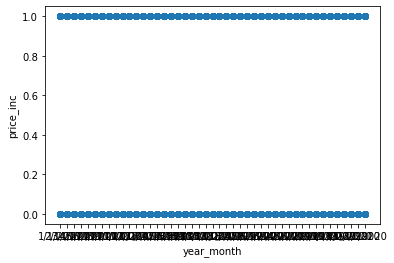

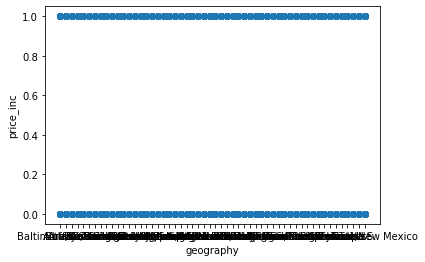

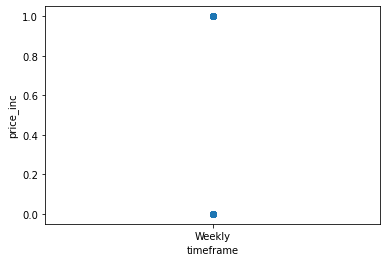

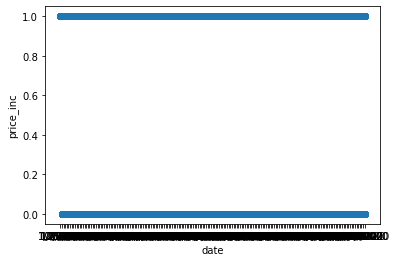

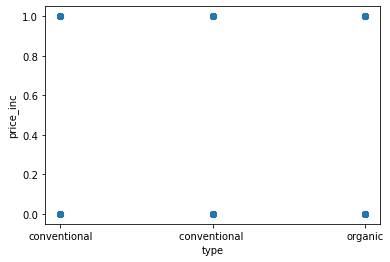

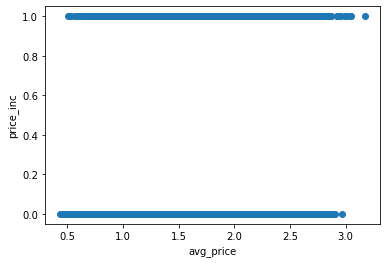

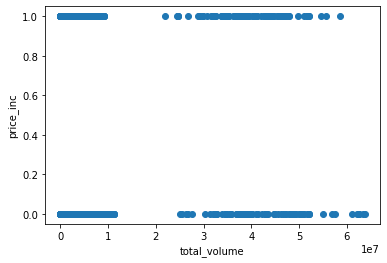

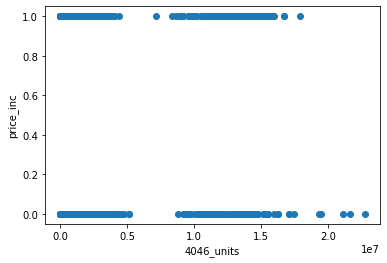

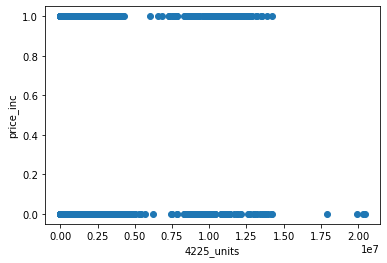

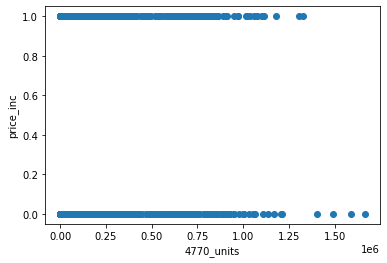

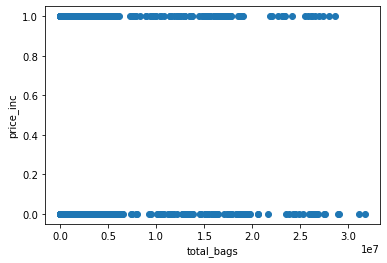

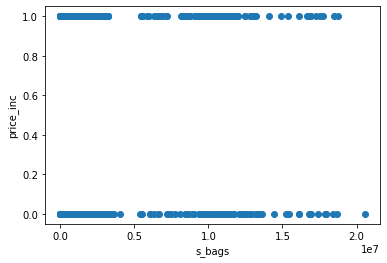

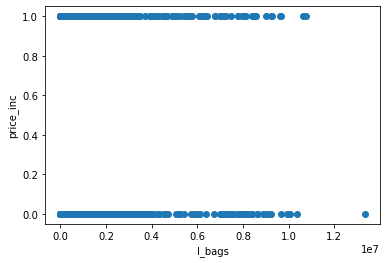

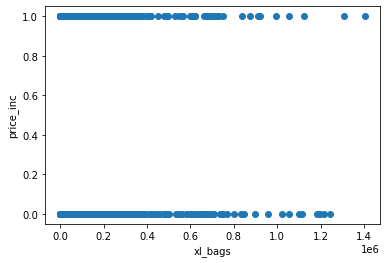

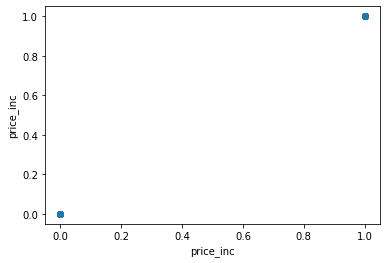

In [50]:
for col in prices_df.columns:
    plt.scatter(prices_df[col], prices_df['price_inc'])
    plt.xlabel(col)
    plt.ylabel('price_inc')
    plt.show()

In [10]:
prices_df.count()

year_month      20410
geography       20410
timeframe       20410
date            20410
type            20410
avg_price       20410
total_volume    20410
4046_units      20410
4225_units      20410
4770_units      20410
total_bags      20410
s_bags          20410
l_bags          20410
xl_bags         20410
price_inc       20410
dtype: int64

## Duplicate check

In [11]:
#pre_prices_df = prices_df.copy()

# y 0 1 2 3 values
#0 for val in y if val >= 0.44 and val < 1.14
#1 for val in y if val >= 1.14 and val < 1.37 
#2 for val in y if val >= 1.37 and val < 1.63
#3 for val in y if val >=1.63 

# ratios 4046_units/total_volume  4225_units/total_volume  4770_units/total_volume  
# ratios s_bags/total_bags  l_bags/total_bags  xl_bags/total_bags

# Establish the bins.
#price_bins = [0.44, 1.14, 1.37, 1.63, 3.17]
#group_names = ["0", "1", "2", "3" ]

print(f"Duplicated entries {prices_df.duplicated().sum()}")
# Categorize prices for NB.
#prices_df["price_cat"] = pd.cut(prices_df['avg_price'], price_bins, labels=group_names)

prices_df.head()

Duplicated entries 0


,year_month,geography,timeframe,date,type,avg_price,total_volume,4046_units,4225_units,4770_units,total_bags,s_bags,l_bags,xl_bags,price_inc
0,1/1/2017,Albany,Weekly,1/2/2017,conventional,1.47,129948.23,4845.77,117027.41,200.36,7874.69,7866.86,7.83,0.00,1
1,1/1/2017,Albany,Weekly,1/8/2017,conventional,1.55,91728.18,3355.47,75641.23,56.91,12674.57,12606.67,67.90,0.00,1
2,1/1/2017,Albany,Weekly,1/15/2017,conventional,1.55,88526.26,3327.65,71956.77,607.03,12634.81,12574.72,60.09,0.00,0
3,1/1/2017,Albany,Weekly,1/22/2017,conventional,1.59,128679.24,4119.94,111173.08,2191.71,11194.51,11060.19,125.50,8.82,1
4,1/1/2017,Albany,Weekly,1/29/2017,conventional,1.31,95424.59,3844.62,78315.15,484.56,12780.26,12393.84,382.06,4.36,0


## Transforming string cols

In [12]:
# type con organic
def change_type_string(str):
    if str == "conventional":
        return 1
    else:
        return 0
    
prices_df['type'] = prices_df['type'].apply(change_type_string)

prices_df.head()

,year_month,geography,timeframe,date,type,avg_price,total_volume,4046_units,4225_units,4770_units,total_bags,s_bags,l_bags,xl_bags,price_inc
0,1/1/2017,Albany,Weekly,1/2/2017,1,1.47,129948.23,4845.77,117027.41,200.36,7874.69,7866.86,7.83,0.00,1
1,1/1/2017,Albany,Weekly,1/8/2017,1,1.55,91728.18,3355.47,75641.23,56.91,12674.57,12606.67,67.90,0.00,1
2,1/1/2017,Albany,Weekly,1/15/2017,1,1.55,88526.26,3327.65,71956.77,607.03,12634.81,12574.72,60.09,0.00,0
3,1/1/2017,Albany,Weekly,1/22/2017,1,1.59,128679.24,4119.94,111173.08,2191.71,11194.51,11060.19,125.50,8.82,1
4,1/1/2017,Albany,Weekly,1/29/2017,1,1.31,95424.59,3844.62,78315.15,484.56,12780.26,12393.84,382.06,4.36,0


## Creating ratios 

In [109]:
prices_df["4046_ratio_units"] = prices_df['4046_units']/prices_df['total_volume']
prices_df["4225_ratio_units"] = prices_df['4225_units']/prices_df['total_volume']
prices_df["4770_ratio_units"] = prices_df['4770_units']/prices_df['total_volume']
prices_df["total_ratio_bags"] = prices_df['total_bags']/prices_df['total_volume']

prices_df["s_ratio_bags"] = prices_df['s_bags']/prices_df['total_bags']
prices_df["l_ratio_bags"] = prices_df['l_bags']/prices_df['total_bags']
prices_df["xl_ratio_bags"] = prices_df['xl_bags']/prices_df['total_bags']


prices_df.head()

,year_month,geography,timeframe,date,type,avg_price,total_volume,4046_units,4225_units,4770_units,...,l_bags,xl_bags,price_inc,4046_ratio_units,4225_ratio_units,4770_ratio_units,total_ratio_bags,s_ratio_bags,l_ratio_bags,xl_ratio_bags
0,1/1/2017,Albany,Weekly,1/2/2017,1,1.47,129948.23,4845.77,117027.41,200.36,...,7.83,0.00,1,0.037290,0.900569,0.001542,0.060599,0.999006,0.000994,0.000000
1,1/1/2017,Albany,Weekly,1/8/2017,1,1.55,91728.18,3355.47,75641.23,56.91,...,67.90,0.00,1,0.036581,0.824624,0.000620,0.138175,0.994643,0.005357,0.000000
2,1/1/2017,Albany,Weekly,1/15/2017,1,1.55,88526.26,3327.65,71956.77,607.03,...,60.09,0.00,0,0.037589,0.812830,0.006857,0.142724,0.995244,0.004756,0.000000
3,1/1/2017,Albany,Weekly,1/22/2017,1,1.59,128679.24,4119.94,111173.08,2191.71,...,125.50,8.82,1,0.032017,0.863955,0.017032,0.086995,0.988001,0.011211,0.000788
4,1/1/2017,Albany,Weekly,1/29/2017,1,1.31,95424.59,3844.62,78315.15,484.56,...,382.06,4.36,0,0.040290,0.820702,0.005078,0.133930,0.969764,0.029895,0.000341


## Creating percents 

In [110]:
prices_df["4046_per_units"] = 100*prices_df['4046_units']/prices_df['total_volume']
prices_df["4225_per_units"] = 100*prices_df['4225_units']/prices_df['total_volume']
prices_df["4770_per_units"] = 100*prices_df['4770_units']/prices_df['total_volume']
prices_df["total_per_bags"] = 100*prices_df['total_bags']/prices_df['total_volume']

prices_df["s_per_bags"] = 100*prices_df['s_bags']/prices_df['total_bags']
prices_df["l_per_bags"] = 100*prices_df['l_bags']/prices_df['total_bags']
prices_df["xl_per_bags"] = 100*prices_df['xl_bags']/prices_df['total_bags']

prices_df.head()

,year_month,geography,timeframe,date,type,avg_price,total_volume,4046_units,4225_units,4770_units,...,s_ratio_bags,l_ratio_bags,xl_ratio_bags,4046_per_units,4225_per_units,4770_per_units,total_per_bags,s_per_bags,l_per_bags,xl_per_bags
0,1/1/2017,Albany,Weekly,1/2/2017,1,1.47,129948.23,4845.77,117027.41,200.36,...,0.999006,0.000994,0.000000,3.729000,90.056948,0.154184,6.059867,99.900568,0.099432,0.000000
1,1/1/2017,Albany,Weekly,1/8/2017,1,1.55,91728.18,3355.47,75641.23,56.91,...,0.994643,0.005357,0.000000,3.658058,82.462369,0.062042,13.817531,99.464282,0.535718,0.000000
2,1/1/2017,Albany,Weekly,1/15/2017,1,1.55,88526.26,3327.65,71956.77,607.03,...,0.995244,0.004756,0.000000,3.758941,81.282966,0.685706,14.272387,99.524409,0.475591,0.000000
3,1/1/2017,Albany,Weekly,1/22/2017,1,1.59,128679.24,4119.94,111173.08,2191.71,...,0.988001,0.011211,0.000788,3.201713,86.395506,1.703235,8.699546,98.800126,1.121085,0.078789
4,1/1/2017,Albany,Weekly,1/29/2017,1,1.31,95424.59,3844.62,78315.15,484.56,...,0.969764,0.029895,0.000341,4.028962,82.070198,0.507794,13.393047,96.976431,2.989454,0.034115


In [13]:
prices_df.count()

year_month      20410
geography       20410
timeframe       20410
date            20410
type            20410
avg_price       20410
total_volume    20410
4046_units      20410
4225_units      20410
4770_units      20410
total_bags      20410
s_bags          20410
l_bags          20410
xl_bags         20410
price_inc       20410
dtype: int64

In [14]:
prices_df = prices_df.dropna()
prices_df.count()

year_month      20410
geography       20410
timeframe       20410
date            20410
type            20410
avg_price       20410
total_volume    20410
4046_units      20410
4225_units      20410
4770_units      20410
total_bags      20410
s_bags          20410
l_bags          20410
xl_bags         20410
price_inc       20410
dtype: int64

In [15]:
prices_df = prices_df.drop(columns=['timeframe'], axis=1)
prices_ml_df = pd.get_dummies(data=prices_df, columns=['year_month', 'geography', 'date', 'type'])

#prices_df = pd.get_dummies(data=prices_df, columns=['year_month', 'geography', 'date'])


In [16]:
prices_ml_df.columns

Index(['avg_price', 'total_volume', '4046_units', '4225_units', '4770_units',
       'total_bags', 's_bags', 'l_bags', 'xl_bags', 'price_inc',
       ...
       'date_9/23/2018', 'date_9/24/2017', 'date_9/29/2019', 'date_9/3/2017',
       'date_9/30/2018', 'date_9/6/2020', 'date_9/8/2019', 'date_9/9/2018',
       'type_0', 'type_1'],
      dtype='object', length=300)

In [17]:
print(prices_ml_df.shape)

(20410, 300)


In [18]:
prices_ml_df.head()

,avg_price,total_volume,4046_units,4225_units,4770_units,total_bags,s_bags,l_bags,xl_bags,price_inc,...,date_9/23/2018,date_9/24/2017,date_9/29/2019,date_9/3/2017,date_9/30/2018,date_9/6/2020,date_9/8/2019,date_9/9/2018,type_0,type_1
0,1.47,129948.23,4845.77,117027.41,200.36,7874.69,7866.86,7.83,0.00,1,...,0,0,0,0,0,0,0,0,0,1
1,1.55,91728.18,3355.47,75641.23,56.91,12674.57,12606.67,67.90,0.00,1,...,0,0,0,0,0,0,0,0,0,1
2,1.55,88526.26,3327.65,71956.77,607.03,12634.81,12574.72,60.09,0.00,0,...,0,0,0,0,0,0,0,0,0,1
3,1.59,128679.24,4119.94,111173.08,2191.71,11194.51,11060.19,125.50,8.82,1,...,0,0,0,0,0,0,0,0,0,1
4,1.31,95424.59,3844.62,78315.15,484.56,12780.26,12393.84,382.06,4.36,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
prices_orig_df = prices_ml_df.drop(columns=['total_volume', '4046_ratio_units', '4225_ratio_units', '4770_ratio_units', 
                               '4046_per_units', '4225_per_units', '4770_per_units', 
                               'total_bags', 's_ratio_bags', 'l_ratio_bags', 'xl_ratio_bags', 
                               's_per_bags', 'l_per_bags', 'xl_per_bags'], axis=1)

prices_rat_df = prices_ml_df.drop(columns=['total_volume', '4046_units', '4225_units', '4770_units', 
                               '4046_per_units', '4225_per_units', '4770_per_units', 
                               'total_bags', 's_bags', 'l_bags', 'xl_bags', 
                               's_per_bags', 'l_per_bags', 'xl_per_bags'], axis=1)

prices_per_df = prices_ml_df.drop(columns=['total_volume', '4046_units', '4225_units', '4770_units', 
                               '4046_ratio_units', '4225_ratio_units', '4770_ratio_units', 
                               'total_bags', 's_bags', 'l_bags', 'xl_bags', 
                               's_ratio_bags', 'l_ratio_bags', 'xl_ratio_bags'], axis=1)

prices_per_rat_df = prices_ml_df.drop(columns=['total_volume', '4046_units', '4225_units', '4770_units', 
                               'total_bags', 's_bags', 'l_bags', 'xl_bags'], axis=1)



prices_ap_orig_df = prices_ml_df.drop(columns=['price_inc', 'total_volume', '4046_ratio_units', '4225_ratio_units', '4770_ratio_units', 
                               '4046_per_units', '4225_per_units', '4770_per_units', 
                               'total_bags', 's_ratio_bags', 'l_ratio_bags', 'xl_ratio_bags', 
                               's_per_bags', 'l_per_bags', 'xl_per_bags'], axis=1)

prices_ap_rat_df = prices_ml_df.drop(columns=['price_inc', 'total_volume', '4046_units', '4225_units', '4770_units', 
                               '4046_per_units', '4225_per_units', '4770_per_units', 
                               'total_bags', 's_bags', 'l_bags', 'xl_bags', 
                               's_per_bags', 'l_per_bags', 'xl_per_bags'], axis=1)

prices_ap_per_df = prices_ml_df.drop(columns=['price_inc', 'total_volume', '4046_units', '4225_units', '4770_units', 
                               '4046_ratio_units', '4225_ratio_units', '4770_ratio_units', 
                               'total_bags', 's_bags', 'l_bags', 'xl_bags', 
                               's_ratio_bags', 'l_ratio_bags', 'xl_ratio_bags'], axis=1)

prices_ap_per_rat_df = prices_ml_df.drop(columns=['price_inc', 'total_volume', '4046_units', '4225_units', '4770_units', 
                               'total_bags', 's_bags', 'l_bags', 'xl_bags'], axis=1)



KeyError: "['4046_ratio_units' '4225_ratio_units' '4770_ratio_units' '4046_per_units'\n '4225_per_units' '4770_per_units' 's_ratio_bags' 'l_ratio_bags'\n 'xl_ratio_bags' 's_per_bags' 'l_per_bags' 'xl_per_bags'] not found in axis"

## Model 

In [118]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

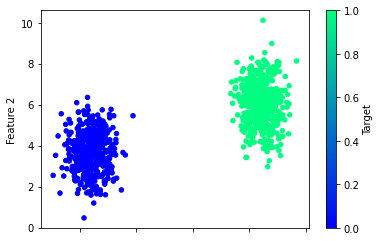

In [119]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [120]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [121]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [122]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [123]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [124]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [125]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 3         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [126]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [127]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 11ms/step - loss: 0.5899 - accuracy: 0.8747
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5783 - accuracy: 0.9840
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5662 - accuracy: 0.9853
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5540 - accuracy: 0.9840
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5415 - accuracy: 0.9840
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5289 - accuracy: 0.9853
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5161 - accuracy: 0.9840
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5034 - accuracy: 0.9853
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4906 - accuracy: 0.9867
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4780 - accuracy: 0.9867
Epoch 11

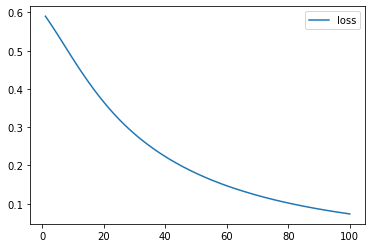

In [128]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

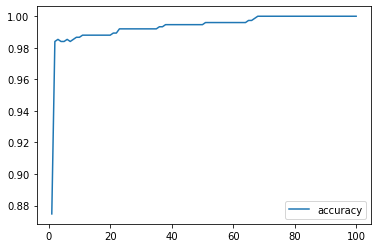

In [129]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [130]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0737 - accuracy: 1.0000
Loss: 0.07370702177286148, Accuracy: 1.0


In [131]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

In [132]:
nn_model.predict(new_X_scaled)

array([[0.00751716],
       [0.87755   ],
       [0.00139475],
       [0.87755   ],
       [0.00845361],
       [0.00959694],
       [0.87755   ],
       [0.87755   ],
       [0.87755   ],
       [0.0089373 ]], dtype=float32)

## Moons example 

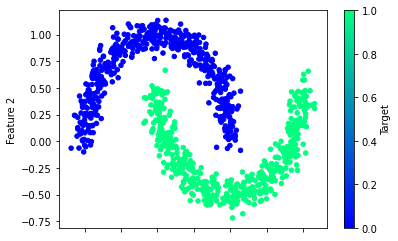

In [133]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [134]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [135]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 1.2987 - accuracy: 0.4107
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1721 - accuracy: 0.4280
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0813 - accuracy: 0.4387
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0201 - accuracy: 0.4533
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9733 - accuracy: 0.4587
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9368 - accuracy: 0.4680
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9058 - accuracy: 0.4773
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8801 - accuracy: 0.4853
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8572 - accuracy: 0.4880
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8370 - accuracy: 0.4960
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.4846 - accuracy: 0.7347
Epoch 84/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4824 - accuracy: 0.7360
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.7400
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.7413
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4755 - accuracy: 0.7440
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4732 - accuracy: 0.7440
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4708 - accuracy: 0.7453
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4684 - accuracy: 0.7480
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4660 - accuracy: 0.7493
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4636 - accuracy: 0.7520
Epoch 93/100


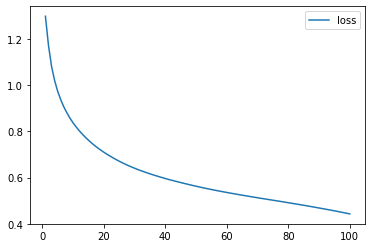

In [136]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

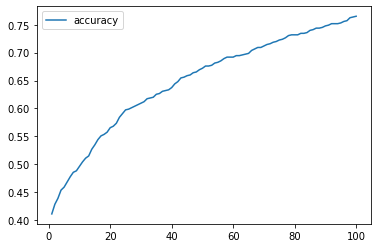

In [137]:
# Plot the loss
history_df.plot(y="accuracy")

In [138]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [139]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [140]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4521 - accuracy: 0.8467
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4340 - accuracy: 0.8493
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4160 - accuracy: 0.8507
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3985 - accuracy: 0.8533
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3816 - accuracy: 0.8533
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3660 - accuracy: 0.8547
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3514 - accuracy: 0.8600
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3386 - accuracy: 0.8640
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3274 - accuracy: 0.8653
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3174 - accuracy: 0.8653
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.2090 - accuracy: 0.9147
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2080 - accuracy: 0.9147
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2071 - accuracy: 0.9160
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2061 - accuracy: 0.9160
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2051 - accuracy: 0.9160
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2042 - accuracy: 0.9160
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2032 - accuracy: 0.9160
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2023 - accuracy: 0.9160
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2013 - accuracy: 0.9160
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2004 - accuracy: 0.9173
Epoch 93/100


## Encoding example 

In [20]:
# Import our dependencies
import pandas as pd
import sklearn as skl


In [21]:

prices_df

# Read in our ramen data
#ramen_df = pd.read_csv("ramen-ratings.csv")

# Print out the Country value counts
#country_counts = ramen_df.Country.value_counts()
#country_counts
prices_df.head()

,year_month,geography,date,type,avg_price,total_volume,4046_units,4225_units,4770_units,total_bags,s_bags,l_bags,xl_bags,price_inc
0,1/1/2017,Albany,1/2/2017,1,1.47,129948.23,4845.77,117027.41,200.36,7874.69,7866.86,7.83,0.00,1
1,1/1/2017,Albany,1/8/2017,1,1.55,91728.18,3355.47,75641.23,56.91,12674.57,12606.67,67.90,0.00,1
2,1/1/2017,Albany,1/15/2017,1,1.55,88526.26,3327.65,71956.77,607.03,12634.81,12574.72,60.09,0.00,0
3,1/1/2017,Albany,1/22/2017,1,1.59,128679.24,4119.94,111173.08,2191.71,11194.51,11060.19,125.50,8.82,1
4,1/1/2017,Albany,1/29/2017,1,1.31,95424.59,3844.62,78315.15,484.56,12780.26,12393.84,382.06,4.36,0


Philadelphia            378
Columbus                378
California              378
Seattle                 378
Albany                  378
Raleigh/Greensboro      378
Dallas/Ft. Worth        378
Roanoke                 378
Hartford/Springfield    378
Denver                  378
Orlando                 378
Northern New England    378
West                    378
New York                378
Las Vegas               378
Syracuse                378
Portland                378
Sacramento              378
Cincinnati/Dayton       378
Buffalo/Rochester       378
Southeast               378
Great Lakes             378
Northeast               378
Detroit                 378
Los Angeles             378
Harrisburg/Scranton     378
Boston                  378
South Carolina          378
San Diego               378
Plains                  378
Nashville               378
Midsouth                378
Boise                   378
Jacksonville            378
Miami/Ft. Lauderdale    378
St. Louis           

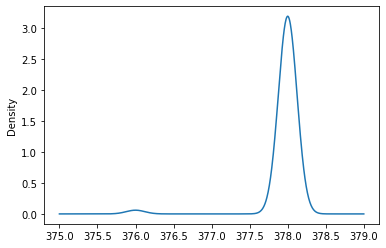

In [22]:
geo_counts = prices_df.geography.value_counts()
print(geo_counts)
# Visualize the value counts
geo_counts.plot.density()

In [23]:
# Determine which values to replace
#replace_countries = list(country_counts[country_counts < 100].index)

# Replace in DataFrame
#for country in replace_countries:
#    ramen_df.Country = ramen_df.Country.replace(country,"Other")


# Check to make sure binning was successful
#ramen_df.Country.value_counts()
geo_counts.count()

54

In [24]:
prices_df = pd.get_dummies(data=prices_df, columns=['year_month', 'date'])

In [25]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(prices_df.geography.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['geography'])
encode_df.head()

,geography_Albany,geography_Atlanta,geography_Baltimore/Washington,geography_Boise,geography_Boston,geography_Buffalo/Rochester,geography_California,geography_Charlotte,geography_Chicago,geography_Cincinnati/Dayton,...,geography_South Carolina,geography_South Central,geography_Southeast,geography_Spokane,geography_St. Louis,geography_Syracuse,geography_Tampa,geography_Total U.S.,geography_West,geography_West Tex/New Mexico
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Merge the two DataFrames together and drop the Country column
prices_df = prices_df.merge(encode_df,left_index=True,right_index=True).drop("geography",1)
prices_df.head()

,type,avg_price,total_volume,4046_units,4225_units,4770_units,total_bags,s_bags,l_bags,xl_bags,...,geography_South Carolina,geography_South Central,geography_Southeast,geography_Spokane,geography_St. Louis,geography_Syracuse,geography_Tampa,geography_Total U.S.,geography_West,geography_West Tex/New Mexico
0,1,1.47,129948.23,4845.77,117027.41,200.36,7874.69,7866.86,7.83,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.55,91728.18,3355.47,75641.23,56.91,12674.57,12606.67,67.90,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1.55,88526.26,3327.65,71956.77,607.03,12634.81,12574.72,60.09,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1.59,128679.24,4119.94,111173.08,2191.71,11194.51,11060.19,125.50,8.82,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1.31,95424.59,3844.62,78315.15,484.56,12780.26,12393.84,382.06,4.36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
len(prices_df.columns)

299

In [28]:
prices_df.head()

,type,avg_price,total_volume,4046_units,4225_units,4770_units,total_bags,s_bags,l_bags,xl_bags,...,geography_South Carolina,geography_South Central,geography_Southeast,geography_Spokane,geography_St. Louis,geography_Syracuse,geography_Tampa,geography_Total U.S.,geography_West,geography_West Tex/New Mexico
0,1,1.47,129948.23,4845.77,117027.41,200.36,7874.69,7866.86,7.83,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.55,91728.18,3355.47,75641.23,56.91,12674.57,12606.67,67.90,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1.55,88526.26,3327.65,71956.77,607.03,12634.81,12574.72,60.09,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1.59,128679.24,4119.94,111173.08,2191.71,11194.51,11060.19,125.50,8.82,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1.31,95424.59,3844.62,78315.15,484.56,12780.26,12393.84,382.06,4.36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Import our dependencies
#import pandas as pd
#from sklearn.preprocessing import StandardScaler

# Read in our dataset
#hr_df = pd.read_csv("hr_dataset.csv")
#hr_df.head()

In [30]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [31]:
# Fit the StandardScaler
scaler.fit(prices_df)

StandardScaler()

In [32]:
# Scale the data
scaled_data = scaler.transform(prices_df)

In [33]:
# Create a DataFrame with the scaled data
transformed_scaled_data = pd.DataFrame(scaled_data, columns=prices_df.columns)
transformed_scaled_data.head()

,type,avg_price,total_volume,4046_units,4225_units,4770_units,total_bags,s_bags,l_bags,xl_bags,...,geography_South Carolina,geography_South Central,geography_Southeast,geography_Spokane,geography_St. Louis,geography_Syracuse,geography_Tampa,geography_Total U.S.,geography_West,geography_West Tex/New Mexico
0,1.357139,0.175881,-0.216797,-0.229048,-0.137644,-0.216559,-0.241772,-0.244943,-0.225118,-0.178934,...,-0.137367,-0.137367,-0.137367,-0.137367,-0.137367,-0.137367,-0.137367,-0.137367,-0.137367,-0.136997
1,1.357139,0.388895,-0.225913,-0.230164,-0.174888,-0.218227,-0.239082,-0.240876,-0.225019,-0.178934,...,-0.137367,-0.137367,-0.137367,-0.137367,-0.137367,-0.137367,-0.137367,-0.137367,-0.137367,-0.136997
2,1.357139,0.388895,-0.226677,-0.230185,-0.178204,-0.211831,-0.239104,-0.240903,-0.225032,-0.178934,...,-0.137367,-0.137367,-0.137367,-0.137367,-0.137367,-0.137367,-0.137367,-0.137367,-0.137367,-0.136997
3,1.357139,0.495402,-0.217100,-0.229591,-0.142913,-0.193409,-0.239911,-0.242203,-0.224923,-0.178778,...,-0.137367,-0.137367,-0.137367,-0.137367,-0.137367,-0.137367,-0.137367,-0.137367,-0.137367,-0.136997
4,1.357139,-0.250146,-0.225032,-0.229798,-0.172482,-0.213255,-0.239023,-0.241058,-0.224498,-0.178857,...,-0.137367,-0.137367,-0.137367,-0.137367,-0.137367,-0.137367,-0.137367,-0.137367,-0.137367,-0.136997


In [34]:
# Import our dependencies
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler,OneHotEncoder
#import pandas as pd
#import tensorflow as tf

# Import our input dataset
#attrition_df = pd.read_csv('HR-Employee-Attrition.csv')
#attrition_df.head()

In [35]:
# Generate our categorical variable list
prices_cat = prices_df.dtypes[prices_df.dtypes == "object"].index.tolist()

In [36]:
# Check the number of unique values in each column
prices_df[prices_cat].nunique()

Series([], dtype: float64)

In [37]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(prices_df[prices_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(prices_cat)
encode_df.head()

""
0
1
2
3
4


In [38]:
# Merge one-hot encoded features and drop the originals
prices_df = prices_df.merge(encode_df,left_index=True, right_index=True)
prices_df = prices_df.drop(prices_cat,1)
prices_df.head()

,type,avg_price,total_volume,4046_units,4225_units,4770_units,total_bags,s_bags,l_bags,xl_bags,...,geography_South Carolina,geography_South Central,geography_Southeast,geography_Spokane,geography_St. Louis,geography_Syracuse,geography_Tampa,geography_Total U.S.,geography_West,geography_West Tex/New Mexico
0,1,1.47,129948.23,4845.77,117027.41,200.36,7874.69,7866.86,7.83,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.55,91728.18,3355.47,75641.23,56.91,12674.57,12606.67,67.90,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1.55,88526.26,3327.65,71956.77,607.03,12634.81,12574.72,60.09,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1.59,128679.24,4119.94,111173.08,2191.71,11194.51,11060.19,125.50,8.82,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1.31,95424.59,3844.62,78315.15,484.56,12780.26,12393.84,382.06,4.36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# Split our preprocessed data into our features and target arrays
y = prices_df["price_inc"].values
X = prices_df.drop(["price_inc"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [40]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [41]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  number_input_features * 2
hidden_nodes_layer2 = number_input_features

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 596)               178204    
_________________________________________________________________
dense_1 (Dense)              (None, 298)               177906    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 299       
Total params: 356,409
Trainable params: 356,409
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [43]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
479/479 [==============================] - 3s 6ms/step - loss: 8674.8213 - accuracy: 0.5096
Epoch 2/100
479/479 [==============================] - 3s 6ms/step - loss: 854.8856 - accuracy: 0.5009
Epoch 3/100
479/479 [==============================] - 3s 6ms/step - loss: 427.0793 - accuracy: 0.5039
Epoch 4/100
479/479 [==============================] - 3s 6ms/step - loss: 210.4950 - accuracy: 0.5062
Epoch 5/100
479/479 [==============================] - 3s 5ms/step - loss: 139.7190 - accuracy: 0.5102
Epoch 6/100
479/479 [==============================] - 3s 5ms/step - loss: 82.2556 - accuracy: 0.5088
Epoch 7/100
479/479 [==============================] - 3s 6ms/step - loss: 57.6613 - accuracy: 0.5098
Epoch 8/100
479/479 [==============================] - 3s 6ms/step - loss: 34.3402 - accuracy: 0.5123
Epoch 9/100
479/479 [==============================] - 3s 6ms/step - loss: 30.2921 - accuracy: 0.5160
Epoch 10/100
479/479 [==============================] - 3s 5ms/step - loss: 

479/479 [==============================] - 3s 6ms/step - loss: 0.6925 - accuracy: 0.5168
Epoch 82/100
479/479 [==============================] - 3s 5ms/step - loss: 0.6925 - accuracy: 0.5168
Epoch 83/100
479/479 [==============================] - 3s 5ms/step - loss: 0.6925 - accuracy: 0.5168
Epoch 84/100
479/479 [==============================] - 3s 6ms/step - loss: 0.6925 - accuracy: 0.5168
Epoch 85/100
479/479 [==============================] - 3s 5ms/step - loss: 0.6926 - accuracy: 0.5168
Epoch 86/100
479/479 [==============================] - 3s 5ms/step - loss: 0.6926 - accuracy: 0.5168
Epoch 87/100
479/479 [==============================] - 3s 6ms/step - loss: 0.6926 - accuracy: 0.5168
Epoch 88/100
479/479 [==============================] - 3s 5ms/step - loss: 0.6925 - accuracy: 0.5168
Epoch 89/100
479/479 [==============================] - 3s 6ms/step - loss: 0.6925 - accuracy: 0.5168
Epoch 90/100
479/479 [==============================] - 3s 6ms/step - loss: 0.6926 - accuracy: 

In [44]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

160/160 - 0s - loss: 0.7013 - accuracy: 0.5105
Loss: 0.7013253569602966, Accuracy: 0.5104840397834778


In [45]:
# Import our dependencies
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#import pandas as pd
#import tensorflow as tf

# Import our input dataset
#diabetes_df = pd.read_csv('diabetes.csv')
#diabetes_df.head()

In [46]:
# Remove diabetes outcome target from features data
#y = diabetes_df.Outcome
#X = diabetes_df.drop(columns="Outcome")

y = prices_df["price_inc"].values
X = prices_df.drop(["price_inc"],1).values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [47]:
# Preprocess numerical data for neural network

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [48]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.513


In [49]:
number_input_features = len(X_train[0])

# Define the basic neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=number_input_features/2, activation="relu", input_dim=number_input_features))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
479/479 [==============================] - 1s 2ms/step - loss: 0.6726 - accuracy: 0.5961
Epoch 2/100
479/479 [==============================] - 1s 2ms/step - loss: 0.6164 - accuracy: 0.6571
Epoch 3/100
479/479 [==============================] - 1s 2ms/step - loss: 0.5900 - accuracy: 0.6788
Epoch 4/100
479/479 [==============================] - 1s 2ms/step - loss: 0.5658 - accuracy: 0.7028
Epoch 5/100
479/479 [==============================] - 1s 2ms/step - loss: 0.5362 - accuracy: 0.7188
Epoch 6/100
479/479 [==============================] - 1s 2ms/step - loss: 0.5019 - accuracy: 0.7538
Epoch 7/100
479/479 [==============================] - 1s 2ms/step - loss: 0.4595 - accuracy: 0.7798
Epoch 8/100
479/479 [==============================] - 1s 2ms/step - loss: 0.4243 - accuracy: 0.7999
Epoch 9/100
479/479 [==============================] - 1s 2ms/step - loss: 0.3865 - accuracy: 0.8259
Epoch 10/100
479/479 [==============================] - 1s 2ms/step - loss: 0.3600 - accura

479/479 [==============================] - 1s 2ms/step - loss: 0.0464 - accuracy: 0.9829
Epoch 81/100
479/479 [==============================] - 1s 2ms/step - loss: 0.0708 - accuracy: 0.9792
Epoch 82/100
479/479 [==============================] - 1s 2ms/step - loss: 0.0416 - accuracy: 0.9855
Epoch 83/100
479/479 [==============================] - 1s 2ms/step - loss: 0.0386 - accuracy: 0.9860
Epoch 84/100
479/479 [==============================] - 1s 2ms/step - loss: 0.0395 - accuracy: 0.9871
Epoch 85/100
479/479 [==============================] - 1s 2ms/step - loss: 0.0402 - accuracy: 0.9865
Epoch 86/100
479/479 [==============================] - 1s 2ms/step - loss: 0.0416 - accuracy: 0.9859
Epoch 87/100
479/479 [==============================] - 1s 2ms/step - loss: 0.0402 - accuracy: 0.9864
Epoch 88/100
479/479 [==============================] - 1s 2ms/step - loss: 0.0526 - accuracy: 0.9827
Epoch 89/100
479/479 [==============================] - 1s 2ms/step - loss: 0.0365 - accuracy: 

In [50]:
# Import our dependencies
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler,OneHotEncoder
#from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
#import pandas as pd
#import tensorflow as tf

# Import our input dataset
#tele_df = pd.read_csv('bank_telemarketing.csv')
#tele_df.head()

In [51]:
# Generate our categorical variable list
#tele_cat = tele_df.dtypes[tele_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
prices_df.nunique()

type                                 2
avg_price                          255
total_volume                     20396
4046_units                       19748
4225_units                       20011
                                 ...  
geography_Syracuse                   2
geography_Tampa                      2
geography_Total U.S.                 2
geography_West                       2
geography_West Tex/New Mexico        2
Length: 299, dtype: int64

In [190]:
# Create a OneHotEncoder instance
#enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#encode_df = pd.DataFrame(enc.fit_transform(tele_df[tele_cat]))

# Add the encoded variable names to the dataframe
#encode_df.columns = enc.get_feature_names(tele_cat)
#encode_df.head()

In [191]:
# Merge one-hot encoded features and drop the originals
#tele_df = tele_df.merge(encode_df,left_index=True, right_index=True)
#tele_df = tele_df.drop(tele_cat,1)
#tele_df.head()

In [52]:
# Remove loan status target from features data
#y = tele_df.Subscribed_yes.values
#X = tele_df.drop(columns=["Subscribed_no","Subscribed_yes"]).values
y = prices_df["price_inc"].values
X = prices_df.drop(["price_inc"],1).values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [193]:
# Create the SVM model
svm = SVC(kernel='linear')

In [ ]:
# Train the model
svm.fit(X_train, y_train)

In [ ]:
# Evaluate the model
y_pred = svm.predict(X_test_scaled)
print(f" SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}")

In [53]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = number_input_features * 2
hidden_nodes_layer2 = number_input_features

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [55]:
##### Train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs=50) 
# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
479/479 [==============================] - 3s 6ms/step - loss: 0.0270 - accuracy: 0.9888
Epoch 2/50
479/479 [==============================] - 3s 5ms/step - loss: 0.0176 - accuracy: 0.9922
Epoch 3/50
479/479 [==============================] - 3s 5ms/step - loss: 0.0163 - accuracy: 0.9927
Epoch 4/50
479/479 [==============================] - 3s 5ms/step - loss: 0.0138 - accuracy: 0.9938
Epoch 5/50
479/479 [==============================] - 3s 5ms/step - loss: 0.0167 - accuracy: 0.9931
Epoch 6/50
479/479 [==============================] - 3s 5ms/step - loss: 0.0196 - accuracy: 0.9917
Epoch 7/50
479/479 [==============================] - 3s 6ms/step - loss: 0.0177 - accuracy: 0.9924
Epoch 8/50
479/479 [==============================] - 3s 5ms/step - loss: 0.0109 - accuracy: 0.9944
Epoch 9/50
479/479 [==============================] - 3s 5ms/step - loss: 0.0144 - accuracy: 0.9941
Epoch 10/50
479/479 [==============================] - 2s 5ms/step - loss: 0.0141 - accuracy: 0.9941

In [58]:
# Import our dependencies
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score
#from sklearn.preprocessing import OneHotEncoder
#import pandas as pd
#import tensorflow as tf

# Import our input dataset
#loans_df = pd.read_csv('loan_status.csv')
#loans_df.head()


In [59]:
# Generate our categorical variable list
#loans_cat = loans_df.dtypes[loans_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
#loans_df[loans_cat].nunique()

In [60]:
# Check the unique value counts to see if binning is required
#loans_df.Years_in_current_job.value_counts()

In [61]:
# Create a OneHotEncoder instance
#enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#encode_df = pd.DataFrame(enc.fit_transform(loans_df[loans_cat]))

# Add the encoded variable names to the DataFrame
#encode_df.columns = enc.get_feature_names(loans_cat)
#encode_df.head()

In [62]:
# Merge one-hot encoded features and drop the originals
#loans_df = loans_df.merge(encode_df,left_index=True, right_index=True)
#loans_df = loans_df.drop(loans_cat,1)
#loans_df.head()

In [63]:
# Remove loan status target from features data
#y = loans_df.Loan_Status_Fully_Paid
#X = loans_df.drop(columns=["Loan_Status_Fully_Paid","Loan_Status_Not_Paid"])

y = prices_df["price_inc"].values
X = prices_df.drop(["price_inc"],1).values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [64]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.649


In [65]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  number_input_features * 2
hidden_nodes_layer2 = number_input_features

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
479/479 [==============================] - 3s 5ms/step - loss: 0.6604 - accuracy: 0.6053
Epoch 2/50
479/479 [==============================] - 3s 6ms/step - loss: 0.6140 - accuracy: 0.6514
Epoch 3/50
479/479 [==============================] - 3s 5ms/step - loss: 0.5771 - accuracy: 0.6860
Epoch 4/50
479/479 [==============================] - ETA: 0s - loss: 0.5336 - accuracy: 0.71 - 3s 6ms/step - loss: 0.5336 - accuracy: 0.7199
Epoch 5/50
479/479 [==============================] - 3s 5ms/step - loss: 0.4757 - accuracy: 0.7623
Epoch 6/50
479/479 [==============================] - 3s 6ms/step - loss: 0.4110 - accuracy: 0.8034
Epoch 7/50
479/479 [==============================] - 3s 6ms/step - loss: 0.3515 - accuracy: 0.8398
Epoch 8/50
479/479 [==============================] - 3s 6ms/step - loss: 0.2887 - accuracy: 0.8735
Epoch 9/50
479/479 [==============================] - 3s 5ms/step - loss: 0.2339 - accuracy: 0.9010
Epoch 10/50
479/479 [==============================] - 3s 

In [66]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  number_input_features * 2
hidden_nodes_layer2 = number_input_features
hidden_nodes_layer3 = number_input_features/2
hidden_nodes_layer4 = number_input_features/4

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
479/479 [==============================] - 3s 7ms/step - loss: 0.6586 - accuracy: 0.5999
Epoch 2/50
479/479 [==============================] - 3s 7ms/step - loss: 0.6201 - accuracy: 0.6461
Epoch 3/50
479/479 [==============================] - 3s 7ms/step - loss: 0.5964 - accuracy: 0.6668
Epoch 4/50
479/479 [==============================] - 3s 7ms/step - loss: 0.5638 - accuracy: 0.6967
Epoch 5/50
479/479 [==============================] - 3s 7ms/step - loss: 0.5245 - accuracy: 0.7274
Epoch 6/50
479/479 [==============================] - 3s 7ms/step - loss: 0.4667 - accuracy: 0.7685
Epoch 7/50
479/479 [==============================] - 3s 7ms/step - loss: 0.4079 - accuracy: 0.8021
Epoch 8/50
479/479 [==============================] - 3s 7ms/step - loss: 0.3476 - accuracy: 0.8392
Epoch 9/50
479/479 [==============================] - 3s 6ms/step - loss: 0.2931 - accuracy: 0.8675
Epoch 10/50
479/479 [==============================] - 3s 6ms/step - loss: 0.2342 - accuracy: 0.8965

In [67]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  number_input_features * 2
hidden_nodes_layer2 = number_input_features
hidden_nodes_layer3 = number_input_features/2
hidden_nodes_layer4 = number_input_features/4

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
479/479 [==============================] - 3s 7ms/step - loss: 0.6581 - accuracy: 0.6011
Epoch 2/100
479/479 [==============================] - 3s 6ms/step - loss: 0.6213 - accuracy: 0.6438
Epoch 3/100
479/479 [==============================] - 3s 6ms/step - loss: 0.5972 - accuracy: 0.6631
Epoch 4/100
479/479 [==============================] - 3s 6ms/step - loss: 0.5638 - accuracy: 0.6911
Epoch 5/100
479/479 [==============================] - 3s 6ms/step - loss: 0.5255 - accuracy: 0.7268
Epoch 6/100
479/479 [==============================] - 3s 7ms/step - loss: 0.4751 - accuracy: 0.7603
Epoch 7/100
479/479 [==============================] - 3s 6ms/step - loss: 0.4195 - accuracy: 0.7930
Epoch 8/100
479/479 [==============================] - 3s 6ms/step - loss: 0.3614 - accuracy: 0.8308
Epoch 9/100
479/479 [==============================] - 3s 6ms/step - loss: 0.2966 - accuracy: 0.8675
Epoch 10/100
479/479 [==============================] - 3s 6ms/step - loss: 0.2474 - accura

479/479 [==============================] - 3s 7ms/step - loss: 0.0147 - accuracy: 0.9942
Epoch 82/100
479/479 [==============================] - 3s 7ms/step - loss: 0.0137 - accuracy: 0.9943
Epoch 83/100
479/479 [==============================] - 3s 6ms/step - loss: 0.0195 - accuracy: 0.9926
Epoch 84/100
479/479 [==============================] - 3s 6ms/step - loss: 0.0258 - accuracy: 0.9897
Epoch 85/100
479/479 [==============================] - 3s 6ms/step - loss: 0.0181 - accuracy: 0.9924
Epoch 86/100
479/479 [==============================] - 3s 7ms/step - loss: 0.0160 - accuracy: 0.9936
Epoch 87/100
479/479 [==============================] - 3s 6ms/step - loss: 0.0148 - accuracy: 0.9937
Epoch 88/100
479/479 [==============================] - 3s 7ms/step - loss: 0.0220 - accuracy: 0.9913
Epoch 89/100
479/479 [==============================] - 3s 6ms/step - loss: 0.0188 - accuracy: 0.9924
Epoch 90/100
479/479 [==============================] - 3s 7ms/step - loss: 0.0139 - accuracy: 

In [68]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  number_input_features * 2
hidden_nodes_layer2 = number_input_features
hidden_nodes_layer3 = number_input_features/2
hidden_nodes_layer4 = number_input_features/4

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
479/479 [==============================] - 3s 6ms/step - loss: 0.6731 - accuracy: 0.5943
Epoch 2/50
479/479 [==============================] - 3s 7ms/step - loss: 0.6287 - accuracy: 0.6393
Epoch 3/50
479/479 [==============================] - 3s 6ms/step - loss: 0.5896 - accuracy: 0.6772
Epoch 4/50
479/479 [==============================] - 3s 6ms/step - loss: 0.5599 - accuracy: 0.7082
Epoch 5/50
479/479 [==============================] - 3s 6ms/step - loss: 0.5153 - accuracy: 0.7425
Epoch 6/50
479/479 [==============================] - 3s 6ms/step - loss: 0.4619 - accuracy: 0.7799
Epoch 7/50
479/479 [==============================] - 3s 6ms/step - loss: 0.3959 - accuracy: 0.8207
Epoch 8/50
479/479 [==============================] - 3s 6ms/step - loss: 0.3254 - accuracy: 0.8584
Epoch 9/50
479/479 [==============================] - 3s 7ms/step - loss: 0.2532 - accuracy: 0.8966
Epoch 10/50
479/479 [==============================] - 3s 6ms/step - loss: 0.2000 - accuracy: 0.9230

In [69]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  number_input_features * 2
hidden_nodes_layer2 = number_input_features
hidden_nodes_layer3 = number_input_features/2
hidden_nodes_layer4 = number_input_features/4

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
479/479 [==============================] - 3s 7ms/step - loss: 0.6734 - accuracy: 0.5950
Epoch 2/100
479/479 [==============================] - 3s 7ms/step - loss: 0.6279 - accuracy: 0.6449
Epoch 3/100
479/479 [==============================] - 3s 7ms/step - loss: 0.5935 - accuracy: 0.6798
Epoch 4/100
479/479 [==============================] - 3s 7ms/step - loss: 0.5587 - accuracy: 0.7077
Epoch 5/100
479/479 [==============================] - 3s 7ms/step - loss: 0.5153 - accuracy: 0.7430
Epoch 6/100
479/479 [==============================] - 3s 7ms/step - loss: 0.4669 - accuracy: 0.7743
Epoch 7/100
479/479 [==============================] - 3s 7ms/step - loss: 0.3984 - accuracy: 0.8180
Epoch 8/100
479/479 [==============================] - 3s 7ms/step - loss: 0.3290 - accuracy: 0.8579
Epoch 9/100
479/479 [==============================] - 3s 7ms/step - loss: 0.2617 - accuracy: 0.8933
Epoch 10/100
479/479 [==============================] - 3s 7ms/step - loss: 0.1949 - accura

Epoch 81/100
479/479 [==============================] - 3s 7ms/step - loss: 0.0164 - accuracy: 0.9918
Epoch 82/100
479/479 [==============================] - 3s 7ms/step - loss: 0.0247 - accuracy: 0.9898
Epoch 83/100
479/479 [==============================] - 3s 7ms/step - loss: 0.0333 - accuracy: 0.9869
Epoch 84/100
479/479 [==============================] - 3s 7ms/step - loss: 0.0345 - accuracy: 0.9862
Epoch 85/100
479/479 [==============================] - 3s 7ms/step - loss: 0.0295 - accuracy: 0.9872
Epoch 86/100
479/479 [==============================] - 3s 6ms/step - loss: 0.0242 - accuracy: 0.9899
Epoch 87/100
479/479 [==============================] - 3s 7ms/step - loss: 0.0189 - accuracy: 0.9921
Epoch 88/100
479/479 [==============================] - 3s 7ms/step - loss: 0.0203 - accuracy: 0.9912
Epoch 89/100
479/479 [==============================] - 3s 7ms/step - loss: 0.0147 - accuracy: 0.9929
Epoch 90/100
479/479 [==============================] - 3s 7ms/step - loss: 0.0117

In [70]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  number_input_features * 2
hidden_nodes_layer2 = number_input_features
hidden_nodes_layer3 = number_input_features/2
hidden_nodes_layer4 = number_input_features/4

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
479/479 [==============================] - 3s 6ms/step - loss: 0.6644 - accuracy: 0.5950
Epoch 2/100
479/479 [==============================] - 3s 6ms/step - loss: 0.6270 - accuracy: 0.6327
Epoch 3/100
479/479 [==============================] - 3s 6ms/step - loss: 0.6017 - accuracy: 0.6639
Epoch 4/100
479/479 [==============================] - 3s 6ms/step - loss: 0.5735 - accuracy: 0.6921
Epoch 5/100
479/479 [==============================] - 3s 7ms/step - loss: 0.5304 - accuracy: 0.7285
Epoch 6/100
479/479 [==============================] - 4s 8ms/step - loss: 0.4843 - accuracy: 0.7592
Epoch 7/100
479/479 [==============================] - 4s 8ms/step - loss: 0.4227 - accuracy: 0.7989
Epoch 8/100
479/479 [==============================] - 4s 7ms/step - loss: 0.3611 - accuracy: 0.8356
Epoch 9/100
479/479 [==============================] - 4s 8ms/step - loss: 0.3041 - accuracy: 0.8667
Epoch 10/100
479/479 [==============================] - 4s 8ms/step - loss: 0.2370 - accura

479/479 [==============================] - 4s 8ms/step - loss: 0.0179 - accuracy: 0.9930
Epoch 82/100
479/479 [==============================] - 4s 7ms/step - loss: 0.0195 - accuracy: 0.9922
Epoch 83/100
479/479 [==============================] - 3s 7ms/step - loss: 0.0155 - accuracy: 0.9937
Epoch 84/100
479/479 [==============================] - 3s 7ms/step - loss: 0.0184 - accuracy: 0.9929
Epoch 85/100
479/479 [==============================] - 4s 9ms/step - loss: 0.0146 - accuracy: 0.9943
Epoch 86/100
479/479 [==============================] - 4s 8ms/step - loss: 0.0138 - accuracy: 0.9942
Epoch 87/100
479/479 [==============================] - 3s 7ms/step - loss: 0.0212 - accuracy: 0.9914
Epoch 88/100
479/479 [==============================] - 4s 8ms/step - loss: 0.0188 - accuracy: 0.9918
Epoch 89/100
479/479 [==============================] - 4s 8ms/step - loss: 0.0209 - accuracy: 0.9920
Epoch 90/100
479/479 [==============================] - 4s 7ms/step - loss: 0.0221 - accuracy: 

In [72]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  number_input_features * 2
hidden_nodes_layer2 = number_input_features
hidden_nodes_layer3 = number_input_features/2
hidden_nodes_layer4 = number_input_features/4

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
479/479 [==============================] - 3s 7ms/step - loss: 0.6644 - accuracy: 0.5947
Epoch 2/50
479/479 [==============================] - 3s 7ms/step - loss: 0.6273 - accuracy: 0.6380
Epoch 3/50
479/479 [==============================] - 3s 7ms/step - loss: 0.6045 - accuracy: 0.6564
Epoch 4/50
479/479 [==============================] - 3s 7ms/step - loss: 0.5699 - accuracy: 0.6918
Epoch 5/50
479/479 [==============================] - 3s 7ms/step - loss: 0.5281 - accuracy: 0.7244
Epoch 6/50
479/479 [==============================] - 3s 7ms/step - loss: 0.4819 - accuracy: 0.7640
Epoch 7/50
479/479 [==============================] - 3s 7ms/step - loss: 0.4246 - accuracy: 0.7991
Epoch 8/50
479/479 [==============================] - 3s 7ms/step - loss: 0.3538 - accuracy: 0.8373
Epoch 9/50
479/479 [==============================] - 3s 6ms/step - loss: 0.2874 - accuracy: 0.8754
Epoch 10/50
479/479 [==============================] - 3s 7ms/step - loss: 0.2322 - accuracy: 0.9025

In [73]:
# Module Model 3
number_input_features = len(X_train[0])
hidden_nodes_layer1   =  number_input_features * 2
hidden_nodes_layer2   =  number_input_features
hidden_nodes_layer3   =  number_input_features / 2
hidden_nodes_layer4   =  number_input_features / 2 / 2

nn = tf.keras.models.Sequential()

# First hidden layer
#, activation="leakyrelu"
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, 
                             activation="relu") )
# Second hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# third hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 596)               178204    
_________________________________________________________________
dense_47 (Dense)             (None, 298)               177906    
_________________________________________________________________
dense_48 (Dense)             (None, 149)               44551     
_________________________________________________________________
dense_49 (Dense)             (None, 74)                11100     
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 75        
Total params: 411,836
Trainable params: 411,836
Non-trainable params: 0
_________________________________________________________________


In [74]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50)

model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


Epoch 1/50
479/479 [==============================] - 3s 6ms/step - loss: 0.6622 - accuracy: 0.5978
Epoch 2/50
479/479 [==============================] - 3s 7ms/step - loss: 0.6236 - accuracy: 0.6419
Epoch 3/50
479/479 [==============================] - 3s 6ms/step - loss: 0.6005 - accuracy: 0.6582
Epoch 4/50
479/479 [==============================] - 3s 6ms/step - loss: 0.5766 - accuracy: 0.6809
Epoch 5/50
479/479 [==============================] - 3s 6ms/step - loss: 0.5512 - accuracy: 0.7066
Epoch 6/50
479/479 [==============================] - 3s 7ms/step - loss: 0.5127 - accuracy: 0.7353
Epoch 7/50
479/479 [==============================] - 3s 7ms/step - loss: 0.4713 - accuracy: 0.7617
Epoch 8/50
479/479 [==============================] - 3s 6ms/step - loss: 0.4244 - accuracy: 0.7874
Epoch 9/50
479/479 [==============================] - 3s 6ms/step - loss: 0.3842 - accuracy: 0.8132
Epoch 10/50
479/479 [==============================] - 3s 7ms/step - loss: 0.3353 - accuracy: 0.8421

In [ ]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


In [ ]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Export our model to HDF5 file
nn_new.save("trained_attrition.h5")

In [ ]:
# Import the model to a new object
nn_imported = tf.keras.models.load_model('trained_attrition.h5')

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

## LinearRegression 

In [61]:
import numpy as np

from sklearn.linear_model import LinearRegression
def get_preds_lin_reg(df, target_col, N, pred_min, offset):
    """
    Given a dataframe, get prediction at each timestep
    Inputs
        df         : dataframe with the values you want to predict     
        target_col : name of the column you want to predict
        N          : use previous N values to do prediction
        pred_min   : all predictions should be >= pred_min
        offset     : for df we only do predictions for df[offset:]
    Outputs
        pred_list  : the predictions for target_col
    """
    # Create linear regression object
    regr = LinearRegression(fit_intercept=True)
    pred_list = []
    for i in range(offset, len(df['adj_close'])):
        X_train = np.array(range(len(df['adj_close'][i-N:i]))) 
        y_train = np.array(df['adj_close'][i-N:i]) 
        X_train = X_train.reshape(-1, 1)     
        y_train = y_train.reshape(-1, 1)
        regr.fit(X_train, y_train)            # Train the model
        pred = regr.predict(N)
    
        pred_list.append(pred[0][0])  
    
    # If the values are < pred_min, set it to be pred_min
    pred_list = np.array(pred_list)
    pred_list[pred_list < pred_min] = pred_min
        
    return pred_list

In [60]:
print(prices_df.shape)

(20410, 299)


In [62]:
y = prices_df["price_inc"].values
X = prices_df.drop(["price_inc"],1).values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [63]:
#get_preds_lin_reg(df, target_col, N, pred_min, offset)
get_preds_lin_reg(prices_df, prices_df["price_inc"], 17000, 0, 3410)

KeyError: 'adj_close'

## XGBoost 

In [ ]:
import math
import numpy as np
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def train_pred_eval_model(X_train_scaled, \
                          y_train_scaled, \
                          X_test_scaled, \
                          y_test, \
                          col_mean, \
                          col_std, \
                          seed=100, \
                          n_estimators=100, \
                          max_depth=3, \
                          learning_rate=0.1, \
                          min_child_weight=1, \
                          subsample=1, \
                          colsample_bytree=1, \
                          colsample_bylevel=1, \
                          gamma=0):
    '''
    Train model, do prediction, scale back to original range and do 
    evaluation
    Use XGBoost here.
    Inputs
        X_train_scaled     : features for training. Scaled to have 
                             mean 0 and variance 1
        y_train_scaled     : target for training. Scaled to have 
                             mean 0 and variance 1
        X_test_scaled      : features for test. Each sample is 
                             scaled to mean 0 and variance 1
        y_test             : target for test. Actual values, not 
                             scaled
        col_mean           : means used to scale each sample of 
                             X_test_scaled. Same length as 
                             X_test_scaled and y_test
        col_std            : standard deviations used to scale each 
                             sample of X_test_scaled. Same length as 
                             X_test_scaled and y_test
        seed               : model seed
        n_estimators       : number of boosted trees to fit
        max_depth          : maximum tree depth for base learners
        learning_rate      : boosting learning rate (xgb’s “eta”)
        min_child_weight   : minimum sum of instance weight(hessian) 
                             needed in a child
        subsample          : subsample ratio of the training 
                             instance
        colsample_bytree   : subsample ratio of columns when 
                             constructing each tree
        colsample_bylevel  : subsample ratio of columns for each 
                             split, in each level
        gamma              : minimum loss reduction required to make 
                             a further partition on a leaf node of 
                             the tree
    Outputs
        rmse               : root mean square error of y_test and 
                             est
        mape               : mean absolute percentage error of 
                             y_test and est
        est                : predicted values. Same length as y_test
    '''
    model = XGBRegressor(seed=model_seed,
                         n_estimators=n_estimators,
                         max_depth=max_depth,
                         learning_rate=learning_rate,
                         min_child_weight=min_child_weight,
                         subsample=subsample,
                         colsample_bytree=colsample_bytree,
                         colsample_bylevel=colsample_bylevel,
                         gamma=gamma)
    
    # Train the model
    model.fit(X_train_scaled, y_train_scaled)
    
    # Get predicted labels and scale back to original range
    est_scaled = model.predict(X_test_scaled)
    est = est_scaled * col_std + col_mean
    # Calculate RMSE
    rmse = math.sqrt(mean_squared_error(y_test, est))
    mape = get_mape(y_test, est)
    
    return rmse, mape, est

## LSTM 

In [ ]:
import math
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
def train_pred_eval_model(x_train_scaled, \
                          y_train_scaled, \
                          x_test_scaled, \
                          y_test, \
                          mu_test_list, \
                          std_test_list, \
                          lstm_units=50, \
                          dropout_prob=0.5, \
                          optimizer='adam', \
                          epochs=1, \
                          batch_size=1):
    '''
    Train model, do prediction, scale back to original range and do 
    evaluation
    Use LSTM here.
    Returns rmse, mape and predicted values
    Inputs
        x_train_scaled  : e.g. x_train_scaled.shape=(451, 9, 1). 
                          Here we are using the past 9 values to  
                          predict the next value
        y_train_scaled  : e.g. y_train_scaled.shape=(451, 1)
        x_test_scaled   : use this to do predictions 
        y_test          : actual value of the predictions
        mu_test_list    : list of the means. Same length as 
                          x_test_scaled and y_test
        std_test_list   : list of the std devs. Same length as 
                          x_test_scaled and y_test
        lstm_units      : dimensionality of the output space
        dropout_prob    : fraction of the units to drop for the 
                          linear transformation of the inputs
        optimizer       : optimizer for model.compile()
        epochs          : epochs for model.fit()
        batch_size      : batch size for model.fit()
    Outputs
        rmse            : root mean square error
        mape            : mean absolute percentage error
        est             : predictions
    '''
    # Create the LSTM network
    model = Sequential()
    model.add(LSTM(units=lstm_units, 
                   return_sequences=True, 
                   input_shape=(x_train_scaled.shape[1],1)))
    # Add dropput with a probability of 0.5
    model.add(Dropout(dropout_prob)) 
    model.add(LSTM(units=lstm_units))
    # Add dropput with a probability of 0.5
    model.add(Dropout(dropout_prob)) 
    model.add(Dense(1))
    # Compile and fit the LSTM network
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    model.fit(x_train_scaled, y_train_scaled, epochs=epochs,   
              batch_size=batch_size, verbose=0)
    
    # Do prediction
    est_scaled = model.predict(x_test_scaled)
    est = (est_scaled * np.array(std_test_list).reshape(-1,1)) + 
          np.array(mu_test_list).reshape(-1,1)
    
    # Calculate RMSE and MAPE
    rmse = math.sqrt(mean_squared_error(y_test, est))
    mape = get_mape(y_test, est)
    
    return rmse, mape, est